# Purpose
Creating a network which knows all users
with EKMs

Assumptions:
- x_lead 5bpf in 6seconds in boundary based EKMs are the EKMs from IMDs ECG signals.
- So we use y lead as the programmer's signal

# Imports and installations

In [1]:
import os
from datetime import datetime
import random
import zipfile

In [2]:
from PIL import Image
import numpy as np

# Unzipping the 5bpf, 5 seconds dataset

In [ ]:
# Define the dataset path and output directories
dataset_path = "../6 seconds_5 bpf EKM dataset_with 6000 EKMs length signal/EKMs_6secondsBoundary_5bpf.zip"
unzip_dir = "../users_zip_files_6sec_5bpf"
users_ekm_dir = "../users_EKM_files_6sec_5bpf"

In [ ]:
# Unzip the main dataset file
with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_dir)

In [ ]:
# Create directory for user EKM files if it doesn't exist
os.makedirs(users_ekm_dir, exist_ok=True)

In [ ]:
# Unzip individual user EKM zip files
user_zip_path = os.path.join(unzip_dir, "Users EKM zip")
for _file in os.listdir(user_zip_path):
    file_name, _ = os.path.splitext(_file)
    file_dir = os.path.join(users_ekm_dir, file_name)
    
    os.makedirs(file_dir, exist_ok=True)
    
    with zipfile.ZipFile(os.path.join(user_zip_path, _file), 'r') as zip_ref:
        zip_ref.extractall(file_dir)

In [3]:
# dataset_path = "../6\ seconds_5\ bpf\ EKM\ dataset_with\ 6000\ EKMs\ length\ signal/EKMs_6secondsBoundary_5bpf.zip"

# ! unzip $dataset_path -d ../users_zip_files_6sec_5bpf

# # Unzipping the EKMs of users
# ! mkdir ../users_EKM_files_6sec_5bpf

# for _file in os.listdir("../users_zip_files_6sec_5bpf/Users EKM zip/"):
#   file_name = _file.split(".")[0]
#   ! unzip ../users_zip_files_6sec_5bpf/Users\ EKM\ zip/$_file -d ../users_EKM_files_5sec_5bpf/$file_name

# Healthy EKMs check
- Moving window checking

In [6]:
path = "../users_EKM_files_6sec_5bpf/2005/x_lead"

In [7]:
EKMs = os.listdir(path)

In [8]:
def are_images_identical(image1_path, image2_path):
    img1 = Image.open(image1_path)
    img2 = Image.open(image2_path)

    return np.array_equal(np.array(img1), np.array(img2))

In [9]:
path_EKM1 = path + "/" + EKMs[0]
path_EKM2 = path + "/" + EKMs[1]

result = are_images_identical(path_EKM1, path_EKM2)
print("Images are identical:" if result else "Images are different.")

Images are different.


# Creating dictionary of list of each user's EKMs

In [10]:
# Getting users id
users_id = []
path = "../users_EKM_files_6sec_5bpf"
dirs = os.listdir(path)
for dir in dirs:
  user_id = dir.split("_")[-1]
  users_id.append(user_id)

In [11]:
len(users_id)

199

In [12]:
! ls ../users_EKM_files_6sec_5bpf/2005/x_lead | head

5bpf-ekm-bpf_recording_signal_length_ekm_dataset-2005-0.png
5bpf-ekm-bpf_recording_signal_length_ekm_dataset-2005-1000.png
5bpf-ekm-bpf_recording_signal_length_ekm_dataset-2005-1001.png
5bpf-ekm-bpf_recording_signal_length_ekm_dataset-2005-1002.png
5bpf-ekm-bpf_recording_signal_length_ekm_dataset-2005-1003.png
5bpf-ekm-bpf_recording_signal_length_ekm_dataset-2005-1004.png
5bpf-ekm-bpf_recording_signal_length_ekm_dataset-2005-1005.png
5bpf-ekm-bpf_recording_signal_length_ekm_dataset-2005-1006.png
5bpf-ekm-bpf_recording_signal_length_ekm_dataset-2005-1007.png
5bpf-ekm-bpf_recording_signal_length_ekm_dataset-2005-1008.png
ls: write error: Broken pipe


In [13]:
# Creating dict of counters for each randomly-chosen users
# of ecg 200 dataset
# Also creating dict of users' EKMs
ecg_200_users_EKM_amount_dict = {}
ecg_200_users_EKMs_dict = {}

for user in users_id:
  ecg_200_users_EKM_amount_dict[user] = 0
  ecg_200_users_EKMs_dict[user] = []

In [14]:
# Counting each user's EKMs in dataset and collecting EKMs of him/her
dataset_path = "../users_EKM_files_6sec_5bpf"
users_files = os.listdir(dataset_path)

for _files in users_files:
    user_id = _files.split("_")[-1]
    if user_id in users_id:
      ecg_200_users_EKM_amount_dict[user_id] = len(os.listdir(f"{dataset_path}/{user_id}/y_lead"))
      ecg_200_users_EKMs_dict[user_id] = os.listdir(f"{dataset_path}/{user_id}/y_lead")

In [15]:
ecg_200_users_EKM_amount_dict

{'4085': 3000,
 '6016': 3000,
 '1047': 3000,
 '1045': 3000,
 '2008': 3000,
 '6021': 3000,
 '4218': 3000,
 '9034': 3000,
 '4214': 3000,
 '2010': 3000,
 '6098': 3000,
 '2019': 3000,
 '6114': 3000,
 '2014': 3000,
 '6056': 3000,
 '6003': 3000,
 '4019': 3000,
 '4227': 3000,
 '9101': 3000,
 '10047': 3000,
 '9064': 3000,
 '1048': 3000,
 '1046': 3000,
 '6123': 3000,
 '9021': 3000,
 '6095': 3000,
 '10098': 3000,
 '2025': 3000,
 '10105': 3000,
 '9007': 3000,
 '6126': 3000,
 '6118': 3000,
 '2006': 3000,
 '4008': 3000,
 '6024': 3000,
 '2016': 3000,
 '1024': 3000,
 '10096': 3000,
 '4050': 3000,
 '4006': 3000,
 '1056': 3000,
 '6025': 3000,
 '10083': 3000,
 '9025': 3000,
 '2005': 3000,
 '4043': 3000,
 '9105': 3000,
 '10064': 3000,
 '6036': 3000,
 '6017': 3000,
 '6027': 3000,
 '6013': 3000,
 '6120': 3000,
 '6020': 3000,
 '8033': 3000,
 '6029': 3000,
 '6124': 3000,
 '1041': 3000,
 '1016': 3000,
 '4125': 3000,
 '6030': 3000,
 '10066': 3000,
 '10022': 3000,
 '6035': 3000,
 '6006': 3000,
 '6099': 3000,
 '

In [16]:
min(ecg_200_users_EKM_amount_dict.values())

3000

# Selecting EKMs of different users
Note: Selecting **1000** EKMs per user

In [17]:
# Selecting N amount of EKMs for each user
users_bpf_EKMs_x = []
users_bpf_EKMs_y = []

N_each_user_ekms_amount = 1000
dataset_path = "../users_EKM_files_6sec_5bpf"

for _files in users_files:
    user_id = _files.split("_")[-1]
    if user_id in users_id:
      for _ekm_number in range(N_each_user_ekms_amount):
        # 5bpf-ekm-bpf_recording_signal_length_ekm_dataset-2005-1008.png
        users_bpf_EKMs_x.append(f"{dataset_path}/{user_id}/y_lead/5bpf-ekm-bpf_recording_signal_length_ekm_dataset-{user_id}-{_ekm_number}.png")
        users_bpf_EKMs_y.append(user_id)

In [18]:
users_bpf_EKMs_x[:10]

['../users_EKM_files_6sec_5bpf/4085/y_lead/5bpf-ekm-bpf_recording_signal_length_ekm_dataset-4085-0.png',
 '../users_EKM_files_6sec_5bpf/4085/y_lead/5bpf-ekm-bpf_recording_signal_length_ekm_dataset-4085-1.png',
 '../users_EKM_files_6sec_5bpf/4085/y_lead/5bpf-ekm-bpf_recording_signal_length_ekm_dataset-4085-2.png',
 '../users_EKM_files_6sec_5bpf/4085/y_lead/5bpf-ekm-bpf_recording_signal_length_ekm_dataset-4085-3.png',
 '../users_EKM_files_6sec_5bpf/4085/y_lead/5bpf-ekm-bpf_recording_signal_length_ekm_dataset-4085-4.png',
 '../users_EKM_files_6sec_5bpf/4085/y_lead/5bpf-ekm-bpf_recording_signal_length_ekm_dataset-4085-5.png',
 '../users_EKM_files_6sec_5bpf/4085/y_lead/5bpf-ekm-bpf_recording_signal_length_ekm_dataset-4085-6.png',
 '../users_EKM_files_6sec_5bpf/4085/y_lead/5bpf-ekm-bpf_recording_signal_length_ekm_dataset-4085-7.png',
 '../users_EKM_files_6sec_5bpf/4085/y_lead/5bpf-ekm-bpf_recording_signal_length_ekm_dataset-4085-8.png',
 '../users_EKM_files_6sec_5bpf/4085/y_lead/5bpf-ekm-bpf

# Vectorization of EKMs

In [19]:
def vertorizing_png_imges(address):
  # Load the PNG image
  image = Image.open(address)

  # Convert the image to RGB mode
  image = image.convert('RGB')

  # Resize the image to match the input size expected by the CNN
  desired_width = 31
  desired_height = 20
  image = image.resize((desired_width, desired_height))

  # Convert the image to a NumPy array
  image_array = np.array(image)

  # Reshape the array to match the input shape expected by the CNN
  # image_array = image_array.reshape((1, desired_height, desired_width, 3))

  # Normalize the array
  image_array = image_array.astype('float32') / 255.0

  return image_array

In [20]:
from IPython.display import clear_output

def progress_bar(index, total_length, name_of_list):
    bar_length = 50

    # Calculate the percentage of completion
    percent_complete = (index / total_length) * 100

    # Clear the current cell's output
    clear_output(wait=True)

    print(name_of_list)

    # Print the progress bar
    print("[", end="")
    completed_blocks = int(bar_length * (percent_complete / 100))
    print("*" * completed_blocks, end="")
    print("-" * (bar_length - completed_blocks), end="]\n")

    # Print the progress in the format: index/total_length
    print(f"{index}/{total_length}")

In [21]:
# Vectorizing EKMs of users
for index, ekm_path in enumerate(users_bpf_EKMs_x):
  progress_bar(index, len(users_bpf_EKMs_x), "Vertorizing")
  users_bpf_EKMs_x[index] = vertorizing_png_imges(ekm_path)

Vertorizing
[*************************************************-]
198999/199000


# Model and prepration of data for fitting them to model

In [22]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LSTM, Reshape
from tensorflow.keras.optimizers import Adam

2024-12-08 12:09:23.168610: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-08 12:09:23.214451: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-08 12:09:23.215502: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-08 12:09:24.053513: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Labels of data (EKMs)

In [23]:
def numerical_labels(labels_arr, dict_of_labels={}):
  # This function change the labels of train and test
  # data to numerical ones.
  # Note: for the test data we should pass the train
  # data labels

  if dict_of_labels == {}:
    unique_labels = np.unique(labels_arr)

    for i, value in enumerate(unique_labels):
        dict_of_labels[value] = i

  # print(dict_of_labels)

  num_lbls = []
  for lbl in labels_arr:
    num_lbls.append(dict_of_labels[lbl])

  num_lbls = np.array(num_lbls)

  return dict_of_labels, num_lbls

In [24]:
label_dict, numerical_y_labels = numerical_labels(users_bpf_EKMs_y)

In [35]:
users_bpf_EKMs_x = np.array(users_bpf_EKMs_x)
numerical_y_labels = np.array(numerical_y_labels)

## Splitting train/test data (EKMs)

In [22]:
# Splitting train and test data by proportion of 80/20
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(users_bpf_EKMs_x, numerical_y_labels, test_size=0.2, random_state=42, stratify=numerical_y_labels)

## Model architeture

## Improved model: No.1

In [25]:
# Creating the CNN model
model = Sequential([
      Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(20, 31, 3)),
      MaxPooling2D(pool_size=(2, 2)),
      Conv2D(64, (3, 3), activation='relu', padding='same'),

      Dropout(0.7),

      Flatten(),
      Dense(512, activation='relu'),
      Dense(256, activation='relu'),
      Dense(199, activation='softmax')
])

# Setting Adam optimizer
optimizer = Adam(learning_rate=0.001)

# Compileing the model with the optimizer
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

2024-12-08 12:09:35.218138: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-12-08 12:09:35.219238: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [23]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=128)

2024-11-24 20:21:01.843916: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-24 20:21:01.844856: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/100
1244/1244 [==============================] - 41s 32ms/step - loss: 1.3617 - accuracy: 0.6344
Epoch 2/100
1244/1244 [==============================] - 40s 32ms/step - loss: 0.4628 - accuracy: 0.8575
Epoch 3/100
1244/1244 [==============================] - 40s 32ms/step - loss: 0.3440 - accuracy: 0.8913
Epoch 4/100
1244/1244 [==============================] - 40s 32ms/step - loss: 0.2842 - accuracy: 0.9095
Epoch 5/100
1244/1244 [==============================] - 40s 32ms/step - loss: 0.2465 - accuracy: 0.9205
Epoch 6/100
1244/1244 [==============================] - 40s 32ms/step - loss: 0.2205 - accuracy: 0.9286
Epoch 7/100
1244/1244 [==============================] - 40s 32ms/step - loss: 0.1991 - accuracy: 0.9347
Epoch 8/100
1244/1244 [==============================] - 39s 32ms/step - loss: 0.1850 - accuracy: 0.9393
Epoch 9/100
1244/1244 [==============================] - 39s 32ms/step - loss: 0.1700 - accuracy: 0.9439
Epoch 10/100
1244/1244 [==============================]

# Evaluation

## Accuracu, loss

In [24]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

1244/1244 - 5s - loss: 0.2774 - accuracy: 0.9566 - 5s/epoch - 4ms/step
Test Loss: 0.2774
Test Accuracy: 0.9566


## AUPR

In [26]:
from sklearn.metrics import precision_recall_curve, auc
from tensorflow.keras.utils import to_categorical

In [27]:
def calculate_aupr(y_true, y_pred_probs):
    """
    Calculate the Area Under the Precision-Recall Curve (AUPR).
    """
    precision, recall, _ = precision_recall_curve(y_true.ravel(), y_pred_probs.ravel())
    aupr = auc(recall, precision)
    return aupr

In [27]:
y_pred_probs = model.predict(X_test)
y_test_onehot = to_categorical(y_test, num_classes=199)

aupr = calculate_aupr(y_test_onehot, y_pred_probs)
print(f"AUPR: {aupr:.4f}")

1244/1244 [==============================] - 5s 4ms/step
AUPR: 0.9887


## AUC-ROC

In [28]:
from sklearn.metrics import roc_auc_score

def calculate_auc_roc(y_true, y_pred_probs):
    """
    Calculate the Area Under the Receiver Operating Characteristic Curve (AUC-ROC).
    """
    auc_roc = roc_auc_score(y_true, y_pred_probs, multi_class='ovr')  # 'ovr' for one-vs-rest
    return auc_roc

In [29]:
y_pred_probs = model.predict(X_test)
auc_roc = calculate_auc_roc(y_test, y_pred_probs)
print(f"AUC-ROC: {auc_roc:.4f}")

1244/1244 [==============================] - 5s 4ms/step
AUC-ROC: 0.9998


## Confusion matrix

In [33]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_confusion_matrix(y_true, y_pred):
    """
    Calculate the confusion matrix.
    """
    cm = confusion_matrix(y_true, y_pred)
    return cm

1244/1244 [==============================] - 5s 4ms/step


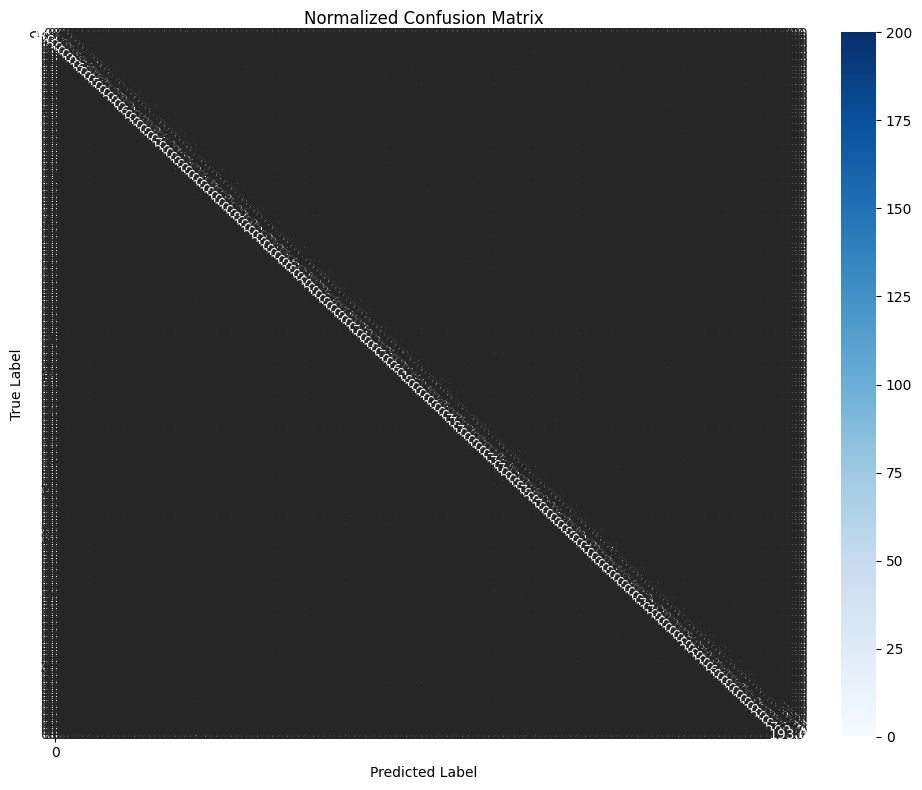

In [36]:
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
cm = calculate_confusion_matrix(y_test, y_pred)
class_names = 199
 
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.2f', xticklabels=class_names, yticklabels=class_names)
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()
plt.close()

# Finding the most faultful user

In [56]:
# Finding the most faultful user
mis_pred = {}
for lbl in label_dict.values():
    mis_pred[lbl] = 0

for index in range(len(y_pred)):
    if y_pred[index] != y_test[index]:
        mis_pred[y_pred[index]] += 1

In [87]:
# Swap keys and values
swapped_label_dict = {v: k for k, v in label_dict.items()}

In [88]:
# Sort the dictionary by values in descending order
sorted_mis_pred = sorted(mis_pred.items(), key=lambda x: x[1], reverse=True)

# Get the top 10 most faultful users
top_10 = sorted_mis_pred[:10]

print("Top 10 most faultful users and their mispredictions:")
for user, count in top_10:
    print(f"User: {swapped_label_dict[user]}, Mispredictions: {count}")

Top 10 most faultful users and their mispredictions:
User: 4214, Mispredictions: 62
User: 10023, Mispredictions: 59
User: 10083, Mispredictions: 50
User: 2007, Mispredictions: 46
User: 4043, Mispredictions: 41
User: 6006, Mispredictions: 41
User: 4085, Mispredictions: 40
User: 6130, Mispredictions: 40
User: 6129, Mispredictions: 34
User: 6031, Mispredictions: 32


# Saving the model

In [89]:
# Save the model in HDF5 format
model.save("../5bpf_6sec_inBoundary_1000_auth_6000.h5")

/home/sadeghi/Amirhossein/panTompkins/bpf based in boudary EKM alpha 0.2 elements 6000/.venv/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Loading the model

In [ ]:
from tensorflow.keras.models import load_model

# Load the HDF5 model
model = load_model("./5bpf_6sec_inBoundary_1000_auth_6000.h5")

# 10 fold validation

In [29]:
from sklearn.model_selection import StratifiedKFold

In [30]:
n_splits = 10
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [38]:
# Metrics to store performance
folds_evaluation = {}
fold_accuracies = []

for index in range(n_splits):
    folds_evaluation[index] = {}

In [46]:
fold_counter = 0

# 10-fold Cross Validation
for train_index, val_index in skf.split(users_bpf_EKMs_x, numerical_y_labels):
    # temp
    if fold_counter == 0:
        fold_counter += 1
        continue
    # temp

    # Split data
    X_train, X_val = users_bpf_EKMs_x[train_index], users_bpf_EKMs_x[val_index]
    y_train, y_val = numerical_y_labels[train_index], numerical_y_labels[val_index]
    
    # Train your model (assuming you have a model object `model`)
    model.fit(X_train, y_train, epochs=100, batch_size=128)
    
    # Validate the model
    # Accuracy, loss
    val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=2)
    fold_accuracies.append(val_accuracy)

    # AUPR
    y_pred_probs = model.predict(X_val)
    y_test_onehot = to_categorical(y_val, num_classes=199)
    aupr = calculate_aupr(y_test_onehot, y_pred_probs)

    # AUC-ROC
    auc_roc = calculate_auc_roc(y_val, y_pred_probs)
    
    # Saving the evaluation results
    folds_evaluation[fold_counter]["accuracy"] =  val_accuracy
    folds_evaluation[fold_counter]["loss"] =  val_loss
    folds_evaluation[fold_counter]["AUPR"] =  aupr
    folds_evaluation[fold_counter]["AUC_ROC"] = auc_roc
    
    fold_counter += 1

Epoch 1/100
1400/1400 [==============================] - 43s 31ms/step - loss: 0.1072 - accuracy: 0.9741
Epoch 2/100
1400/1400 [==============================] - 43s 31ms/step - loss: 0.0917 - accuracy: 0.9761
Epoch 3/100
1400/1400 [==============================] - 43s 31ms/step - loss: 0.0879 - accuracy: 0.9768
Epoch 4/100
1400/1400 [==============================] - 43s 30ms/step - loss: 0.0864 - accuracy: 0.9769
Epoch 5/100
1400/1400 [==============================] - 44s 31ms/step - loss: 0.0850 - accuracy: 0.9773
Epoch 6/100
1400/1400 [==============================] - 43s 31ms/step - loss: 0.0842 - accuracy: 0.9773
Epoch 7/100
1400/1400 [==============================] - 43s 31ms/step - loss: 0.0806 - accuracy: 0.9781
Epoch 8/100
1400/1400 [==============================] - 43s 30ms/step - loss: 0.0837 - accuracy: 0.9776
Epoch 9/100
1400/1400 [==============================] - 42s 30ms/step - loss: 0.0809 - accuracy: 0.9783
Epoch 10/100
1400/1400 [==============================]

In [47]:
folds_evaluation

{0: {'accuracy': 0.9573366641998291,
  'loss': 0.257964164018631,
  'AUPR': 0.9888582061653239,
  'AUC_ROC': 0.9997986104766255},
 1: {'accuracy': 0.9801005125045776,
  'loss': 0.10186415910720825,
  'AUPR': 0.9971921937922992,
  'AUC_ROC': 0.9999618826455512},
 2: {'accuracy': 0.9801507592201233,
  'loss': 0.09285906702280045,
  'AUPR': 0.996777511389659,
  'AUC_ROC': 0.999956494594183},
 3: {'accuracy': 0.9867336750030518,
  'loss': 0.06404966115951538,
  'AUPR': 0.9980269909859882,
  'AUC_ROC': 0.9999790188315313},
 4: {'accuracy': 0.9912562966346741,
  'loss': 0.04987214878201485,
  'AUPR': 0.9986819780571647,
  'AUC_ROC': 0.9999845020557334},
 5: {'accuracy': 0.9881909489631653,
  'loss': 0.06455987691879272,
  'AUPR': 0.9980243259941595,
  'AUC_ROC': 0.9999534960154306},
 6: {'accuracy': 0.9901507496833801,
  'loss': 0.04817540571093559,
  'AUPR': 0.9987955071655022,
  'AUC_ROC': 0.9999807065631185},
 7: {'accuracy': 0.9814572930335999,
  'loss': 0.0969230905175209,
  'AUPR': 0.9

In [48]:
# Average accuracy across folds
average_accuracy = np.mean(fold_accuracies)
print("10-Fold Cross-Validation Accuracy:", average_accuracy)

10-Fold Cross-Validation Accuracy: 0.9808263580004374


In [49]:
folds_evaluation["average_accuracy"] = average_accuracy

In [50]:
import json

# Save to a text file
with open("../5bpf_6seconds_inBoundary_auth_1000EKMs.txt", "w") as file:
    json.dump(folds_evaluation, file, indent=4) 

In [53]:
np.min(fold_accuracies)

0.9579899311065674

In [54]:
np.max(fold_accuracies)

0.9912562966346741